In [1]:
import pandas as pd

In [2]:
from google.colab import files
files.upload()

Saving churn.csv to churn.csv


{'churn.csv': b'customer_id,age,tenure,monthly_charges,total_charges,contract_type,churn\r\nC001,25,1,900,900,Monthly,Yes\r\nC002,45,24,450,10800,Yearly,No\r\nC003,30,3,800,2400,Monthly,Yes\r\nC004,50,36,300,10800,Yearly,No\r\nC005,23,2,950,1900,Monthly,Yes\r\nC006,40,18,500,9000,Yearly,No\r\nC007,35,6,700,4200,Monthly,Yes\r\nC008,60,48,250,12000,Yearly,No\r\nC009,28,4,850,3400,Monthly,Yes\r\nC010,55,30,400,12000,Yearly,No\r\n'}

In [3]:
df=pd.read_csv("churn.csv")
df.head()

,customer_id,age,tenure,monthly_charges,total_charges,contract_type,churn
0,C001,25,1,900,900,Monthly,Yes
1,C002,45,24,450,10800,Yearly,No
2,C003,30,3,800,2400,Monthly,Yes
3,C004,50,36,300,10800,Yearly,No
4,C005,23,2,950,1900,Monthly,Yes


In [4]:
df.shape

(10, 7)

In [5]:
df.columns

Index(['customer_id', 'age', 'tenure', 'monthly_charges', 'total_charges',
       'contract_type', 'churn'],
      dtype='object')

In [6]:
df['churn'].value_counts()

,count
churn,
Yes,5
No,5


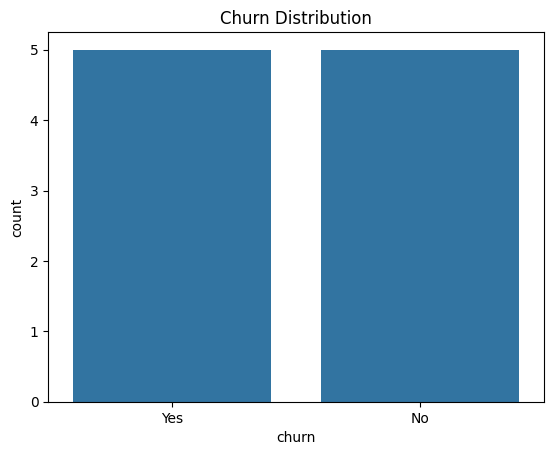

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='churn',data=df)
plt.title("Churn Distribution")
plt.show()

In [8]:
df.describe()

,age,tenure,monthly_charges,total_charges
count,10.000000,10.000000,10.000000,10.00000
mean,39.100000,17.200000,610.000000,6740.00000
std,13.016656,16.691981,260.128174,4562.94252
min,23.000000,1.000000,250.000000,900.00000
25%,28.500000,3.250000,412.500000,2650.00000
50%,37.500000,12.000000,600.000000,6600.00000
75%,48.750000,28.500000,837.500000,10800.00000
max,60.000000,48.000000,950.000000,12000.00000


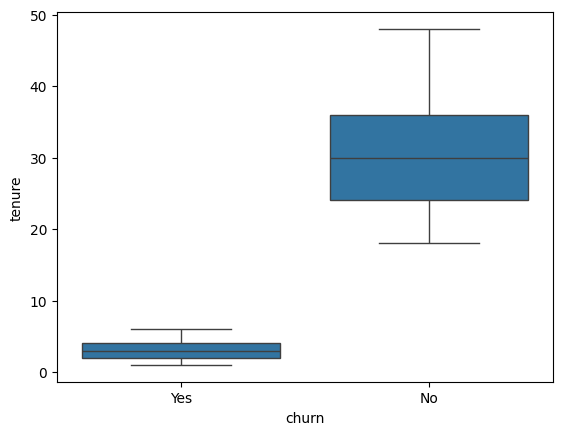

In [9]:
sns.boxplot(x='churn',y='tenure',data=df)
plt.show()

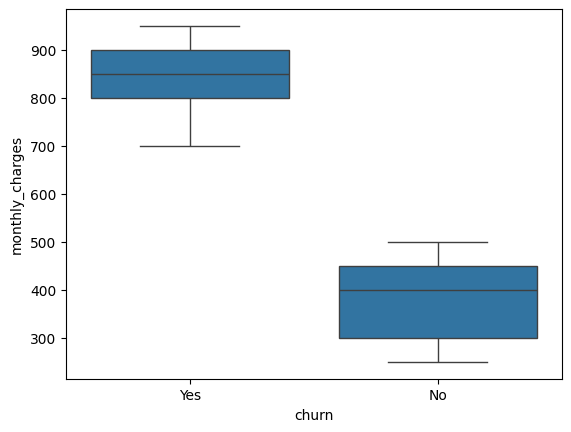

In [10]:
sns.boxplot(x='churn',y='monthly_charges',data=df)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      10 non-null     object
 1   age              10 non-null     int64 
 2   tenure           10 non-null     int64 
 3   monthly_charges  10 non-null     int64 
 4   total_charges    10 non-null     int64 
 5   contract_type    10 non-null     object
 6   churn            10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


In [12]:
df['churn']=df['churn'].map({'Yes':'1','No':'2'})

In [13]:
df=pd.get_dummies(df,columns=['contract_type'],drop_first='True')

In [14]:
df.drop('customer_id',axis=1,inplace=True)

In [15]:
df.head()

,age,tenure,monthly_charges,total_charges,churn,contract_type_Yearly
0,25,1,900,900,1,False
1,45,24,450,10800,2,True
2,30,3,800,2400,1,False
3,50,36,300,10800,2,True
4,23,2,950,1900,1,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   10 non-null     int64 
 1   tenure                10 non-null     int64 
 2   monthly_charges       10 non-null     int64 
 3   total_charges         10 non-null     int64 
 4   churn                 10 non-null     object
 5   contract_type_Yearly  10 non-null     bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 542.0+ bytes


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X=df.drop('churn',axis=1)
Y=df['churn']

In [19]:
scaler=StandardScaler()

In [20]:
X_scaled=scaler.fit_transform(X)

In [21]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [22]:
X_scaled.head()

,age,tenure,monthly_charges,total_charges,contract_type_Yearly
0,-1.141822,-1.023024,1.175139,-1.349108,-1.0
1,0.477784,0.429418,-0.648353,0.937907,1.0
2,-0.736921,-0.896725,0.769919,-1.002590,-1.0
3,0.882685,1.187213,-1.256183,0.937907,1.0
4,-1.303783,-0.959875,1.377750,-1.118096,-1.0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('churn', axis=1)
y = df['churn']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 5)
(2, 5)
(8,)
(2,)


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression(max_iter=1000)

In [29]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred=model.predict(X_test)

In [31]:
y_prob=model.predict_proba(X_test)

In [32]:
y_prob_churn=y_prob[:,1]

In [33]:
print(y_test.values)
print(y_pred)

['1' '2']
['1' '2']


In [34]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1 0]
 [0 1]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [37]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,y_prob_churn)
print("ROC AUC :",roc)

ROC AUC : 1.0


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_model=RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

In [40]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [41]:
rf_pred=rf_model.predict(X_test)
rf_prob=rf_model.predict_proba(X_test)[:,1]

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [43]:
accuracy_score(y_test, rf_pred)


1.0

In [44]:
roc_auc_score(y_test, y_prob_churn)
roc_auc_score(y_test, rf_prob)


np.float64(1.0)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
cv_scores=cross_val_score(
    rf,
    X,
    y,
    cv=5,
    scoring='roc_auc'
)
print("Cross-validation ROC-AUC scores: ",cv_scores)
print("Average ROC-AUC: ",cv_scores.mean())

Cross-validation ROC-AUC scores:  [1. 1.]
Average ROC-AUC:  1.0


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X, y)


print("Best Parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV ROC-AUC: 1.0


In [55]:
final_model = rf_model


In [56]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

final_pred = final_model.predict(X_test)
final_prob = final_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, final_pred))

print("\nClassification Report:")
print(classification_report(y_test, final_pred))

print("\nFinal ROC-AUC:")
print(roc_auc_score(y_test, final_prob))


Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Final ROC-AUC:
1.0


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

importances = final_model.feature_importances_

feature_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_df)


                Feature  Importance
3         total_charges    0.224490
0                   age    0.214286
4  contract_type_Yearly    0.214286
1                tenure    0.193878
2       monthly_charges    0.153061


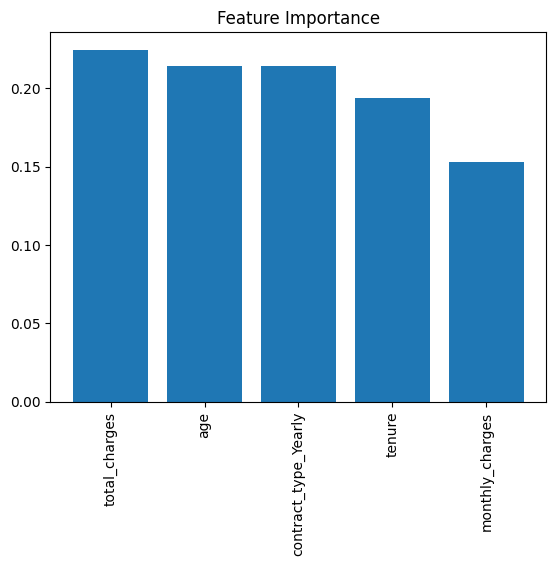

In [58]:
plt.figure()
plt.bar(feature_df["Feature"], feature_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()


In [59]:
import joblib

joblib.dump(final_model, "churn_model.pkl")


['churn_model.pkl']

In [60]:
loaded_model = joblib.load("churn_model.pkl")


In [61]:
def predict_churn(new_data):
    prediction = final_model.predict(new_data)
    probability = final_model.predict_proba(new_data)[:, 1]
    return prediction, probability


In [62]:
sample = X_test.iloc[[0]]
pred, prob = predict_churn(sample)

print("Prediction:", pred)
print("Probability of churn:", prob)


Prediction: ['1']
Probability of churn: [0.01]
